In [134]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt


In [135]:
xraw = np.array(range(101))

In [136]:
y = np.sin(2*np.pi*1*(xraw + 25/16)/25)

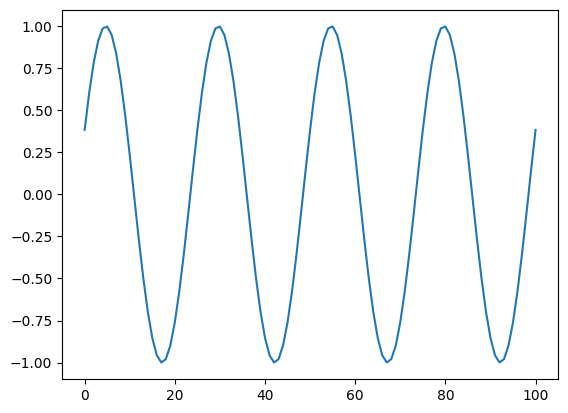

In [137]:
plt.plot(y)

In [138]:
feats = pd.DataFrame()

feats['SIN_1_25_1'] = np.sin(2*np.pi*1*(xraw)/25)
feats['COS_1_25_1'] = np.cos(2*np.pi*1*(xraw)/25)

In [139]:
Xtrain,Xtest,ytrain,ytest = train_test_split(feats,y,test_size=25,random_state=42,shuffle=False)

In [140]:

model = Pipeline(
    steps = [
        #('scaler',MinMaxScaler()),
        ('learner',LinearRegression(fit_intercept=True))
    ]
).fit(Xtrain,ytrain)

In [141]:
yfit = pd.Series(model.predict(Xtrain),index=Xtrain.index)
ypred = pd.Series(model.predict(Xtest),index=Xtest.index)

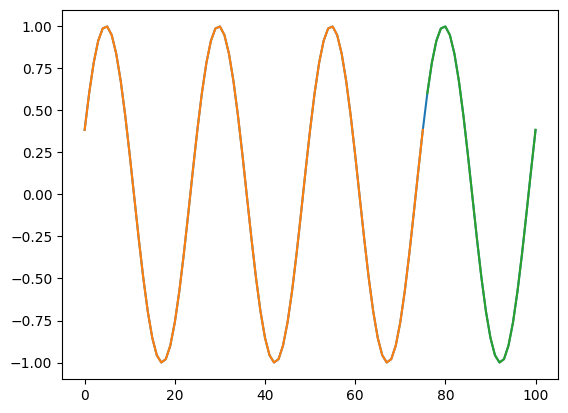

In [142]:

plt.plot(y)
plt.plot(yfit[:])
plt.plot(ypred)

In [143]:
print(model['learner'].coef_)
print(model['learner'].intercept_)

[0.92387953 0.38268343]
-1.0234868508263162e-16
